In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

In [18]:
#DATASET USED:
df = pd.read_csv('data/opp-stops_state.csv')
df = df.dropna()
#only use Texas and divide into races
tx = df.loc[df["state"] == "TX"]

,state,city,geography,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
2917,TX,Statewide,TX,Anderson County,white,0.009666,0.091078,0.357298,0.271570,7605.857143,1.070666e+06
2918,TX,Statewide,TX,Anderson County,black,0.016948,0.067230,0.459893,0.308993,1793.000000,2.150716e+05
2919,TX,Statewide,TX,Anderson County,hispanic,0.015861,0.069734,0.347107,0.214615,1248.571429,7.443300e+05
2923,TX,Statewide,TX,Angelina County,white,0.010130,0.091078,0.478088,0.328352,8337.714286,1.070666e+06
2924,TX,Statewide,TX,Angelina County,black,0.018994,0.067230,0.389671,0.341526,1882.142857,2.150716e+05
...,...,...,...,...,...,...,...,...,...,...,...
3653,TX,Statewide,TX,Williamson County,black,0.025413,0.067230,0.494577,0.305252,3181.428571,2.150716e+05
3654,TX,Statewide,TX,Williamson County,hispanic,0.024083,0.069734,0.322340,0.200787,6339.714286,7.443300e+05
3661,TX,Statewide,TX,Wise County,white,0.015098,0.091078,0.451655,0.317677,16829.714286,1.070666e+06
3662,TX,Statewide,TX,Wise County,black,0.043500,0.067230,0.489914,0.277676,1375.285714,2.150716e+05


In [23]:
counties =  pd.read_csv('2016_US_County_Level_Presidential_Results.csv')
counties = counties.dropna()
counties.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [31]:
counties['color'] = np.where(counties["per_dem"] > counties["per_gop"], "blue", "red")
counties = counties.loc[counties["state_abbr"] == "TX"]
colors = np.array(counties['color'])

113

In [39]:
#In df counties, keep only the counties for which we have the data
counties = counties.loc[counties["county_name"].isin(tx_white["subgeography"])]
tx_hit = tx[['subgeography','hit_rate','subject_race']]
tx_white = tx_hit.loc[tx_hit["subject_race"]== 'white']
tx_white['color'] = colors
tx_white_b = tx_white.loc[tx_white['color'] == 'blue']
tx_white_r = tx_white.loc[tx_white['color'] == 'red']
tx_black = tx_hit.loc[tx_hit["subject_race"]== 'black']
tx_black['color'] = colors
tx_black_b = tx_black.loc[tx_black['color'] == 'blue']
tx_black_r = tx_black.loc[tx_black['color'] == 'red']
tx_hisp = tx_hit.loc[tx_hit["subject_race"]== 'hispanic']
tx_hisp['color'] = colors
tx_hisp_b = tx_hisp.loc[tx_hisp['color'] == 'blue']
tx_hisp_r = tx_hisp.loc[tx_hisp['color'] == 'red']


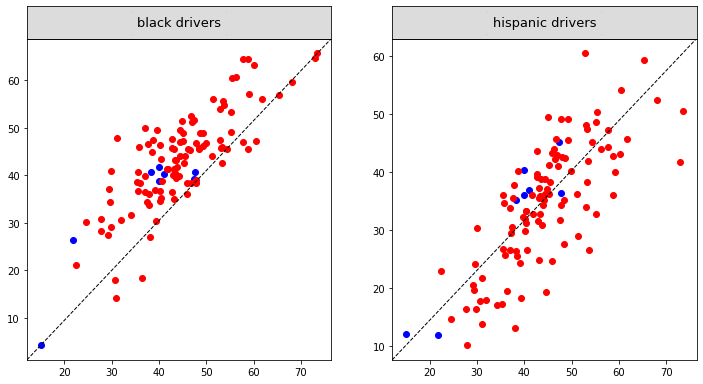

In [47]:
fig1, [ax1,ax2] = plt.subplots(1, 2,figsize=(12, 6.5))
ax1.scatter(tx_white_b['hit_rate']*100, tx_black_b['hit_rate']*100, c = 'blue')
ax1.scatter(tx_white_r['hit_rate']*100, tx_black_r['hit_rate']*100, c = 'red')
ax1.plot([0,1],[0,1], linestyle = '--', linewidth = 1, color='black',transform=ax1.transAxes)
ax2.scatter(tx_white_b['hit_rate']*100, tx_hisp_b['hit_rate']*100, c = 'blue')
ax2.scatter(tx_white_r['hit_rate']*100, tx_hisp_r['hit_rate']*100, c = 'red')
ax2.plot([0,1],[0,1], linestyle = '--', linewidth = 1, color='black',transform=ax2.transAxes)

for ax in [ax1,ax2]:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="10%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('gainsboro')
    at = AnchoredText('black drivers', loc=10, prop=dict(backgroundcolor='gainsboro', size=13, color='black'))
    cax.add_artist(at)
at = AnchoredText('hispanic drivers', loc=10, prop=dict(backgroundcolor='gainsboro', size=13, color='black'))
cax.add_artist(at)
